# Hypothesis 1: Plastic litter is increasing over time

## Hypothesis
- **Alternative Hypothesis (H₁):** The amount of plastic litter is increasing over time.
- **Null Hypothesis (H₀):** The amount of plastic litter is not increasing over time.

## Rationale
Studies and environmental reports suggest that plastic pollution has been rising over the years due to increased plastic production and inadequate waste management. This hypothesis aims to confirm whether the trend holds in the dataset over time.

Hannah Ritchie, Veronika Samborska, and Max Roser (2023) state that "Plastic production has sharply increased over the last 70 years. In 1950, the world produced just two million tonnes. It now produces over 450 million tonnes" (Our World in Data). This sharp rise in production suggests a likely increase in plastic pollution, which this analysis seeks to validate.

## Data Analysis & Validation Approach

To explore this hypothesis, we will first conduct an Exploratory Data Analysis (EDA). 

This will involve:

- Creating a bar chart to visually represent the amount of plastic litter collected each year, allowing us to see any potential trends.
- Generating a moving average plot to smooth out fluctuations in the data and reveal the overall direction of change over time.

Following the EDA, we will use two statistical methods to validate our findings:

- Linear regression: This method will help us determine if there is a statistically significant positive relationship between time and the amount of plastic litter. In simpler terms, it will show us if the amount of plastic is steadily going up over the years.
- Mann-Kendall trend test: This test will allow us to confirm if there is a consistent upward trend in plastic litter, even if the data has some variations. This test is useful because it doesn't assume the data follows a perfect pattern.

# Change working directory

To facilitate proper file access, the working directory is to be adjusted to its parent directory
* os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis/jupyter_notebooks'

To set the parent of the current directory the new current directory:
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis'

Confirm the new current directory

## Loading CSV's & Importing Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/02_PROCESSED_NEA-Seafloor-Litter.csv')
df_alltime = pd.read_csv('data/03_ALL_TIME_litter_totals.csv')
df_yearly = pd.read_csv('data/04_YEARLY_litter_totals.csv')
df_monthly = pd.read_csv('data/05_MONTHLY_litter_totals.csv')


### Visual Exploration: Annual Plastic Litter Distribution (Bar Chart)

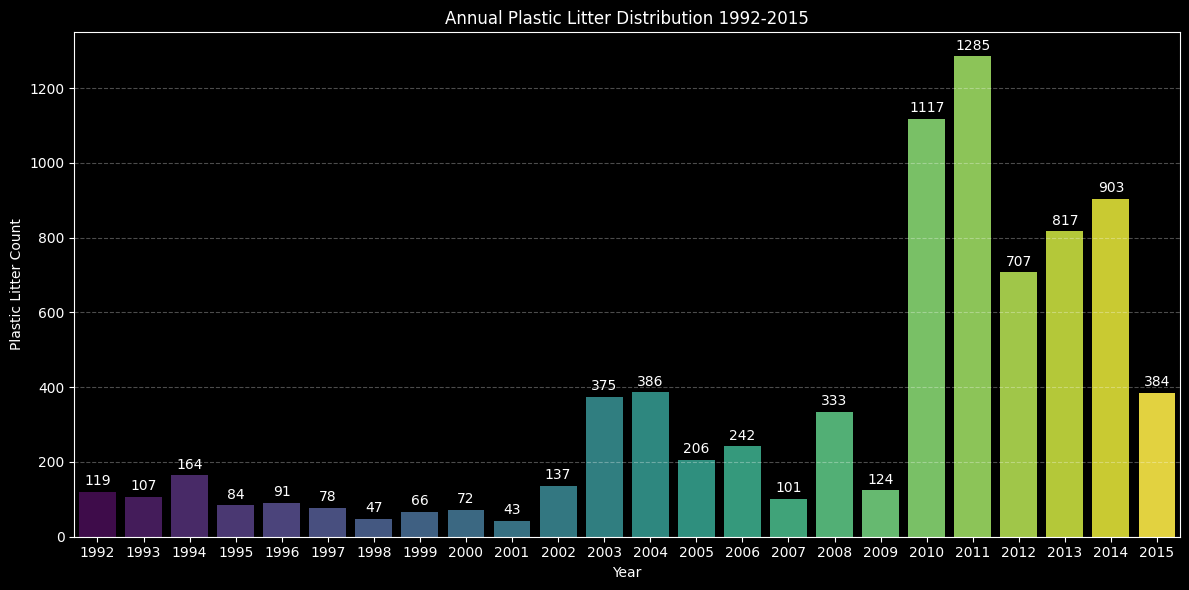

In [23]:
plt.style.use('dark_background')

figure, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=df_yearly['year'],y=df_yearly['Plastic'], palette='viridis', hue=df_yearly['year'], legend=False)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# add title and labels
plt.title('Annual Plastic Litter Distribution 1992-2015')
plt.xlabel('Year')
plt.ylabel('Plastic Litter Count')

# annotate
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height()+10, str(int(i.get_height())), ha='center', va='bottom', color='white')

# show the plot
plt.tight_layout()
plt.show()
#

**Analysis:** The above bar chart indicates a substantial increase in plastic litter counts during the later years of the observed period, particularly from 2010 to 2015. While the earlier years show relatively low and fluctuating counts, the data suggests a clear upward trend in plastic litter over time, supporting the hypothesis that plastic is increasing over time. The most significant increase occurred in the second half of the time period.

### Trend Visualisation: Moving Average of Plastic Litter

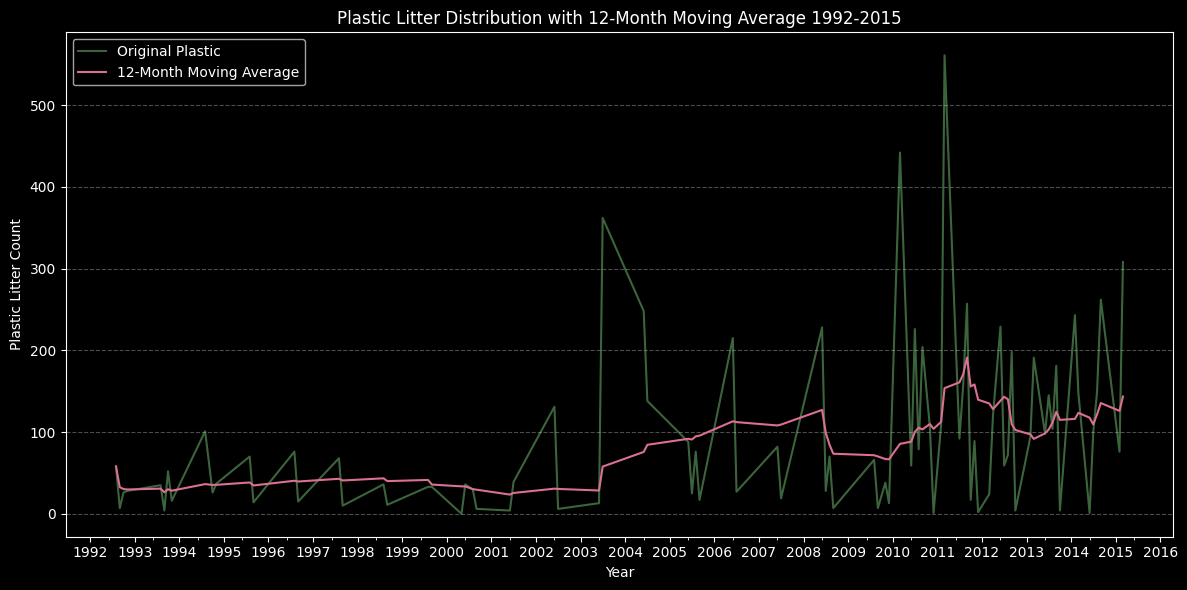

In [33]:
import matplotlib.dates as mdates # this module for date formatting

# Step 1: Create the 'year_month' column by combining 'year' and 'month'
df_monthly['year_month'] = pd.to_datetime(df_monthly[['year', 'month']].assign(day=1))

# Step 2: Calculate the 12-month rolling average for Plastic
df_monthly['Plastic_MA'] = df_monthly['Plastic'].rolling(window=12, min_periods=1).mean()

# Step 3: Plotting both the original Plastic and the 12-month moving average
figure, ax = plt.subplots(figsize=(12,6))

# Plot the original Plastic data which shows the monthly distribution of Plastic litter
sns.lineplot(x=df_monthly['year_month'], y=df_monthly['Plastic'], label='Original Plastic', color='palegreen', alpha=0.4)

# Plot the 12-month moving average which shows the trend of Plastic litter over time
sns.lineplot(x=df_monthly['year_month'], y=df_monthly['Plastic_MA'], label='12-Month Moving Average', color='palevioletred')

# Reduce clutter by setting the x-axis labels every 12 months (every year)
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Shows every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the year as YYYY
ax.xaxis.set_minor_locator(mdates.MonthLocator(6))  # Optional: Show minor ticks every 6 months

# Add grid, title, and labels
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.title('Plastic Litter Distribution with 12-Month Moving Average 1992-2015')
plt.xlabel('Year')
plt.ylabel('Plastic Litter Count')

# Show the legend to differentiate between the original and the moving average
plt.legend()

# Tight layout for a clean plot
plt.tight_layout()
plt.show()


**Analysis:** This moving average graph illustrates the annual plastic litter count alongside a 12-month moving average. The raw data, represented by the fluctuating green line, demonstrates considerable year-to-year variability. This variability is attributed to factors such as inconsistent monthly data collection. 

To identify the underlying trend, despite the inconsistent survey months, a 12-month moving average was employed, as depicted by the pink line. This technique effectively smooths fluctuations, revealing the broader pattern of plastic litter distribution over time. The moving average indicates a general upward trajectory, particularly evident after 2002. A pronounced increase is observed around 2011, followed by a period of relative stabilisation.

The data presented suggests a general increase in plastic litter over the observed timeframe. While annual fluctuations are present, the moving average provides evidence supporting the hypothesis of an increasing trend in plastic litter.

### Statistical Validation: Linear Regression Analysis

To investigate whether plastic litter is increasing over time, as the hypothesis suggests, linear regression analysis was used.

This method was selected because it directly tests trends and provides measurable evidence, such as the slop and p-value, which provide answers as to how strong the trend is and how likely the increase is real and not by random chance.

                            OLS Regression Results                            
Dep. Variable:             Plastic_MA   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     181.1
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           1.13e-22
Time:                        10:31:57   Log-Likelihood:                -396.72
No. Observations:                  86   AIC:                             797.4
Df Residuals:                      84   BIC:                             802.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5595      5.276      4.466      0.0

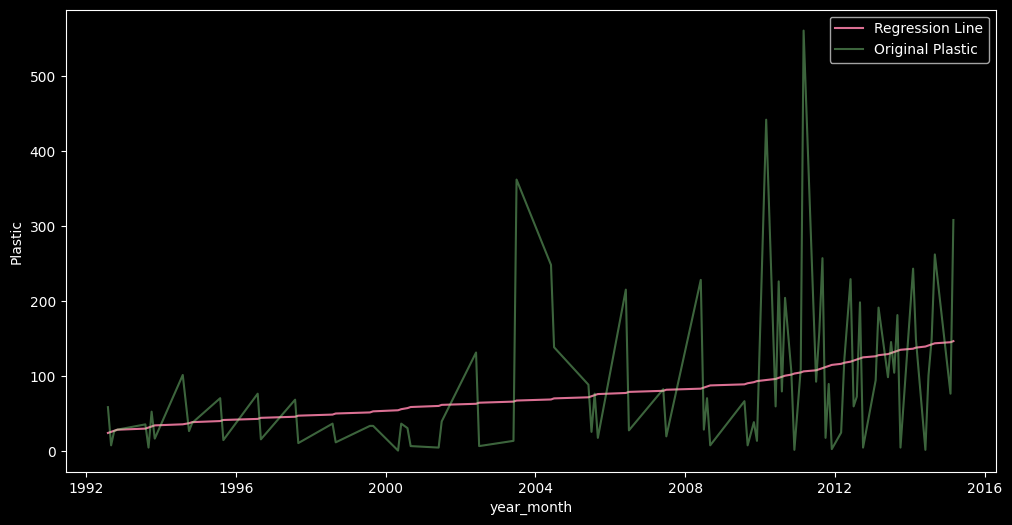

In [38]:
import statsmodels.api as sm 

x = range(len(df_monthly))
y = df_monthly['Plastic_MA'] # Use the 12-month moving average for Plastic because it removes the jumps in the data

# Add a constant to the independent variable (x) so that the model also fits the intercept
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Get the predicted values (the regression line)
y_pred = model.predict(x)

# Plot the regression line
figure, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=df_monthly['year_month'], y=y_pred, label='Regression Line', color='palevioletred')

# Plot the original Plastic data
sns.lineplot(x=df_monthly['year_month'], y=df_monthly['Plastic'], label='Original Plastic', color='palegreen', alpha=0.4)

# print regression statistics
print(model.summary())




When it came to interpreting the linear regression results, I was familiar with several key statistics, such as the R-squared value, which indicates how well the regression line fits the data (in this case, a value of 0.683 suggests a decently good fit), the F-statistic, which tests the overall significance of the model, and Kurtosis, which describes the shape of the data's distribution. These metrics collectively suggested a positive trend in plastic litter over time, aligning with our initial hypothesis.

However, I encountered other result metrics that were new to me. To better understand their significance, I utilised an AI tool, chatGPT, which provided the following insights:

    OLS Regression Results Summary:
    R-squared: 0.683 (68.3% of variation in plastic litter explained by the model).
    Adjusted R-squared: 0.679 (model remains strong after adjusting for predictors).
    F-statistic: 181.1, p-value = 1.13e-22 (model is highly significant).
    Coefficients:

    Constant: 23.5595, p-value = 0.000 (statistically significant).
    Slope (x1): 1.4426, p-value = 0.000 (plastic litter increases by 1.4426 units per time unit).
    Diagnostics:

    Durbin-Watson: 0.217 (potential autocorrelation in residuals).
    Omnibus test: p-value = 0.005 (residuals may not be normally distributed).
    Conclusion: Plastic litter is increasing over time with a statistically significant trend, though there are some residual issues to address.

### Trend Confirmation: Mann-Kendall Non-Parametric Test

In [43]:
import pymannkendall as mk

trend_result = mk.original_test(df_monthly['Plastic_MA'])

# print the result
print(trend_result, '\n')

# In a nicer format
print(f'The Plastic litter has a trend of {trend_result.trend} over the period 1992-2015 with a p-value of {trend_result.p}')




Mann_Kendall_Test(trend='increasing', h=True, p=2.220446049250313e-16, z=8.16469025283939, Tau=0.5991792065663475, s=2190.0, var_s=71880.66666666667, slope=1.347222222222222, intercept=34.45138888888891) 

The Plastic litter has a trend of increasing over the period 1992-2015 with a p-value of 2.220446049250313e-16


The Mann-Kendall test has comfirmed our hypothesis. 

**AI results summary:**
- Trend: 'Increasing' — The Mann-Kendall test confirms an upward trend in plastic litter over time, consistent with your linear regression findings.
- h = True: The trend is statistically significant, meaning it's unlikely to be random.
- p-value = 2.220446049250313e-16: This extremely small p-value indicates a very high level of confidence in the upward trend, suggesting it's not a fluke.
- Slope = 1.35: The Theil-Sen slope shows that, on average, plastic litter increases by 1.35 units per time period.
- Intercept = 34.45: The Theil-Sen intercept value.
- Conclusion: The Mann-Kendall test confirms a statistically significant increase in plastic litter over time, with a consistent rate of change.

## Conclusion

Both the OLS regression and Mann-Kendall test confirm a clear and statistically significant upward trend in plastic litter over time. The regression analysis shows that the plastic litter count increases by approximately 1.44 units per time period, while the Mann-Kendall test indicates a similar rate of increase at 1.35 units. Both analyses provide strong evidence that this trend is real and not due to random chance, with extremely small p-values supporting the reliability of the results. This suggests that plastic litter is steadily increasing, highlighting the need for targeted interventions.

Based on the results from both the OLS regression and the Mann-Kendall test, we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁). The data shows a statistically significant increasing trend in plastic litter over time.

## Ref
- H. Ritchie, V. Samborska, and M. Roser. (2023). Plastic Pollution. Published online at OurWorldinData.org. Retrieved from https://ourworldindata.org/plastic-pollution